# 0 Utils

In [1]:
import os
import numpy as np
import seaborn as sb
%matplotlib inline
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

N_JOBS = 6

# 1 Load Dataset

In [2]:
personas = pd.read_csv('..\\..\\Datos\\working\\personas_cotizacion2.csv',encoding = "ISO-8859-1")
personas.head(2)



,Unnamed: 0,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_nrofam,is_profesion,...,nro_cot_estu,nro_proyectos,rut,sexo,tipo_cliente,Altos del Valle,Edificio Urban 1470,San Andres Del Valle,Edificio Mil610,Edificio Junge
0,0,True,True,True,False,True,True,True,False,True,...,0.0,2.0,000.000.000-0,Femenino,Natural,0.0,1.0,1.0,0.0,0.0
1,1,True,True,True,False,False,True,True,False,False,...,0.0,1.0,1.462.558-5,Masculino,Natural,0.0,0.0,0.0,1.0,0.0


In [3]:
# Ready Data Set

print(personas.shape)
# print(personas.columns)
drop_columns = [personas.columns[0], 'rut', 'negocio', 'max_rango_edad']

p_negocio = personas.negocio
personas = personas.drop(drop_columns, axis=1)

print(personas.shape)
print(p_negocio.shape)

personas = pd.get_dummies(personas)

print(personas.shape)
# personas.describe()

(6184, 33)
(6184, 29)
(6184,)
(6184, 44)


## Correlacion 

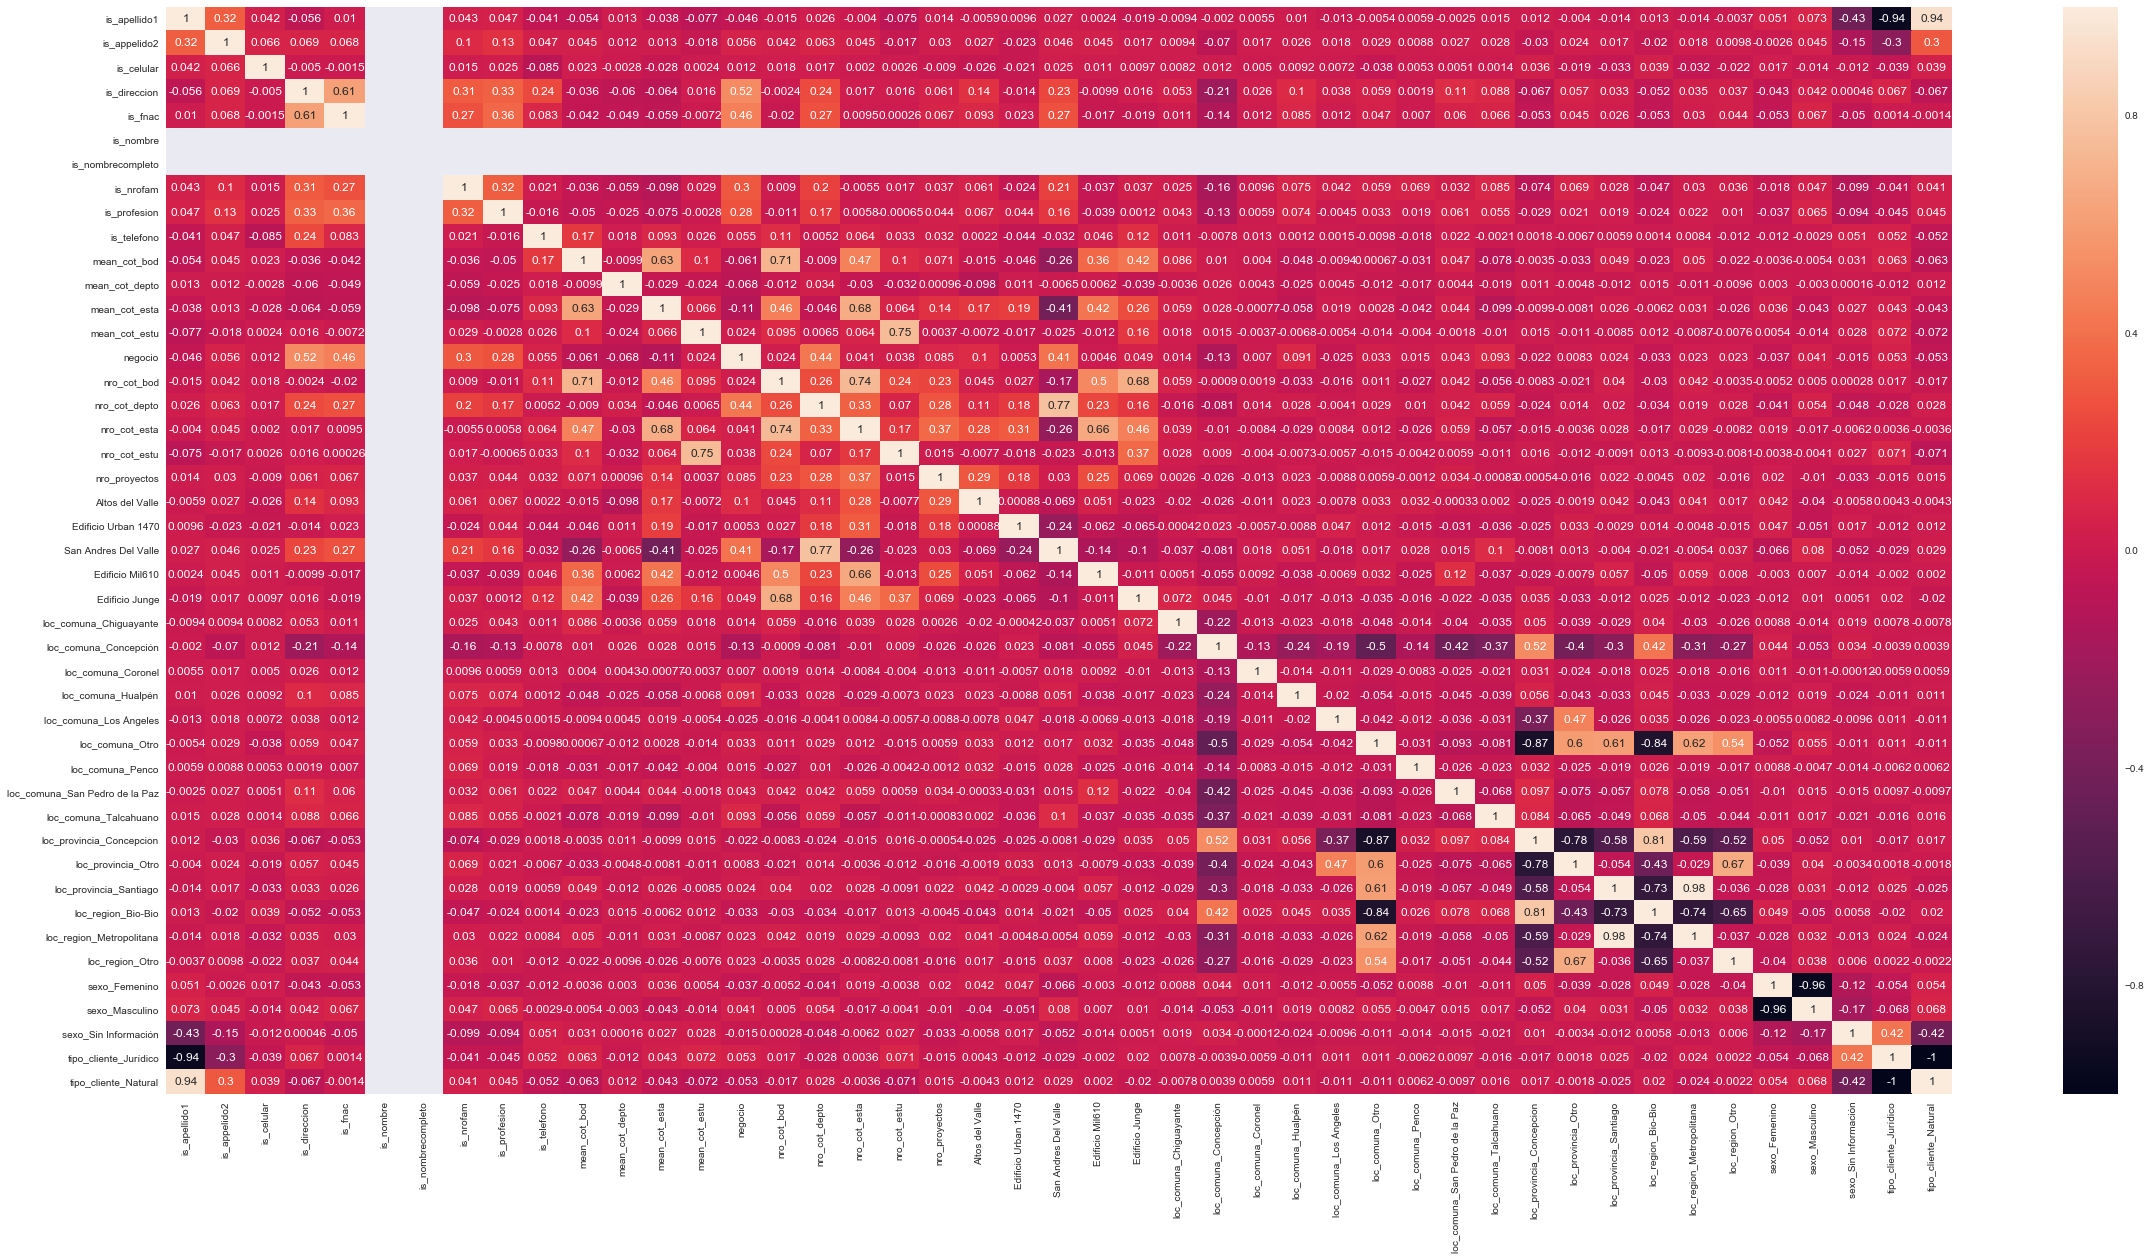

In [17]:
from scipy.stats.stats import pearsonr, spearmanr, kendalltau
corr_p = personas.corr(method='pearson')

import seaborn as sns
f = plt.figure(figsize=(40,20))
g = sns.heatmap(corr_p, annot=True).get_figure()
g.savefig('..\\img\\time_series_corr.png')

In [4]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold()
personas_vt = vt.fit_transform(personas)

In [5]:
print(personas_vt.shape)
print(vt.variances_)

(6184, 42)
[3.86592115e-03 3.46103495e-02 3.22369291e-03 1.68261708e-01
 1.21009373e-01 0.00000000e+00 0.00000000e+00 2.19102729e-01
 2.31505056e-01 1.04605279e-01 1.07119169e-01 6.64540086e-03
 1.82111084e-01 1.06965040e-03 1.23318594e+00 6.74268715e+00
 2.10241906e+00 1.00053721e-02 6.80100882e-02 2.24485339e-01
 1.38244627e+00 6.57895046e+00 1.03303582e+00 6.27199161e-01
 1.99600145e-02 2.12470336e-01 7.70171824e-03 2.47435428e-02
 1.55962096e-02 8.94302829e-02 8.65596063e-03 6.77494314e-02
 5.26767059e-02 9.50818914e-02 6.27450718e-02 3.76018361e-02
 6.66432089e-02 3.87925732e-02 3.03871235e-02 2.39752694e-01
 2.43566839e-01 2.05800681e-02 4.34704320e-03 4.34704320e-03]


# 3 Supervised Learning: Classification

## 3.1 Libraries

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

## 3.2 Check the Dataset

In [7]:
print("Tamaño Total: ",personas.shape)
print("Personas que hicieron Negocio: ",p_negocio[p_negocio == True].shape)
print("Personas que no Hicieorn Negocio: ",p_negocio[p_negocio == False].shape)

Tamaño Total:  (6184, 44)
Personas que hicieron Negocio:  (1101,)
Personas que no Hicieorn Negocio:  (5083,)


In [29]:
p_negocio.head()

0    False
1    False
2    False
3     True
4    False
Name: negocio, dtype: bool

In [66]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(p_negocio)
Y = lb.transform(p_negocio)
Y = lb.transform(Y)
X = personas

Y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4143, 44) (2041, 44) (4143, 1) (2041, 1)


In [74]:
# Import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = X.shape[1]
input_shape = (n_cols,)



# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=10)

# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=30,
                    verbose=1,
                    validation_split=0.3, 
                    callbacks=[early_stopping_monitor])

score = model.evaluate(X_test, y_test)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



Train on 2900 samples, validate on 1243 samples
Epoch 1/30
2900/2900 [==============================] - 5s 2ms/step - loss: nan - acc: 0.1741 - val_loss: nan - val_acc: 0.1778
Epoch 2/30
 928/2900 [========>.....................] - ETA: 0s - loss: nan - acc: 0.1713

C:\Users\joaquin\Anaconda3\lib\site-packages\keras\callbacks.py:538: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


2900/2900 [==============================] - 1s 215us/step - loss: nan - acc: 0.1741 - val_loss: nan - val_acc: 0.1778
Epoch 3/30
2900/2900 [==============================] - 1s 204us/step - loss: nan - acc: 0.1741 - val_loss: nan - val_acc: 0.1778
Epoch 4/30
2900/2900 [==============================] - 1s 202us/step - loss: nan - acc: 0.1741 - val_loss: nan - val_acc: 0.1778
Epoch 5/30
2900/2900 [==============================] - 1s 205us/step - loss: nan - acc: 0.1741 - val_loss: nan - val_acc: 0.1778
Epoch 6/30
2900/2900 [==============================] - 1s 205us/step - loss: nan - acc: 0.1741 - val_loss: nan - val_acc: 0.1778
Epoch 7/30
2900/2900 [==============================] - 1s 199us/step - loss: nan - acc: 0.1741 - val_loss: nan - val_acc: 0.1778
Epoch 8/30
2900/2900 [==============================] - 1s 201us/step - loss: nan - acc: 0.1741 - val_loss: nan - val_acc: 0.1778
Epoch 9/30
2900/2900 [==============================] - 1s 203us/step - loss: nan - acc: 0.1741 - val

In [75]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test)
confusion_matrix(y_test, y_pred)

array([[   0, 1666],
       [   0,  375]], dtype=int64)

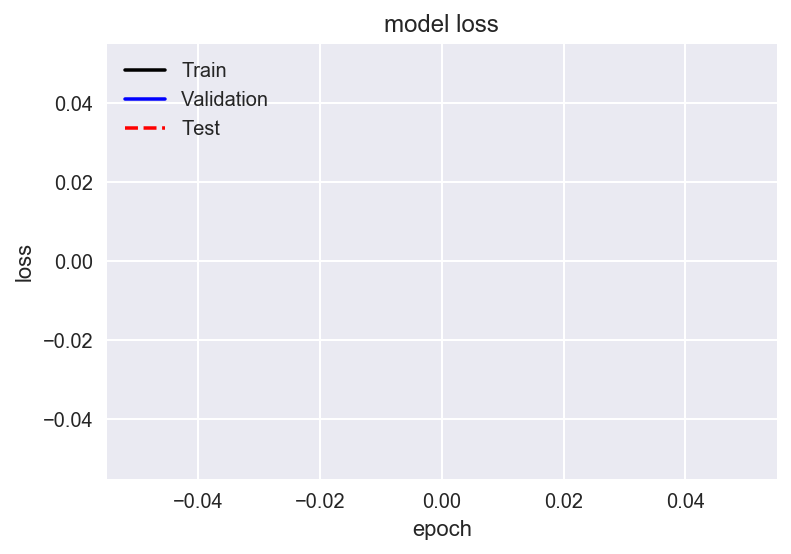

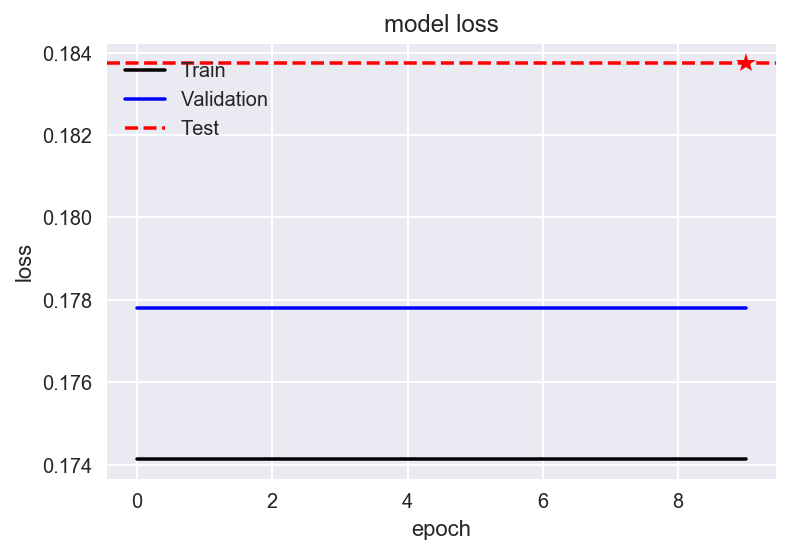

In [69]:
def plot(loss,val_loss,score):
    plt.clf()
    plt.plot(loss,color='k',label='train')
    plt.plot(val_loss,color='b')
    plt.axhline(score,linestyle='--',color='r')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.plot(len(loss)-1, score, '*', color='r', markersize=10)
    plt.legend(['Train', 'Validation','Test'], loc='upper left')
    plt.show()
#Ploteo de entrenamiento.


plot(history.history['loss'],history.history['val_loss'],score[0])
plot(history.history['acc'],history.history['val_acc'],score[1])

In [70]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
plot_confusion_matrix(history, p_negocios, )

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

seed = 1000

In [51]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

Text(0,0.5,'sepal width (cm)')

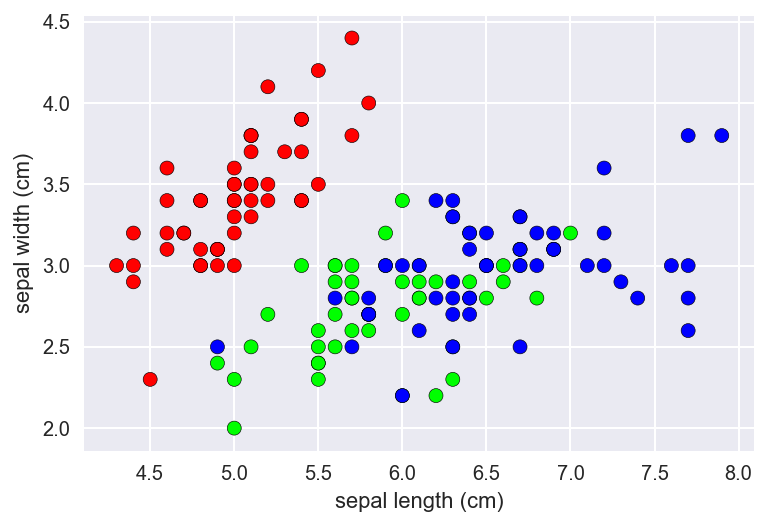

In [53]:
iris = datasets.load_iris()
x = iris.data
y = to_categorical(iris.target)
labels_names = iris.target_names
xid, yid = 0, 1

le = LabelEncoder()
encoded_labels = le.fit_transform(iris.target_names)

plt.scatter(x[:,xid],x[:,yid],c=y,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel(iris.feature_names[xid])
plt.ylabel(iris.feature_names[yid])

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed)

C:\Users\joaquin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [56]:
model = Sequential()
model.add(Dense(8,activation='relu',input_shape = (4,)))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer = 'rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train,
                    epochs = 200,
                    batch_size = 16,
                    verbose=1,
                    validation_data=(x_val,y_val))

Train on 96 samples, validate on 24 samples
Epoch 1/200
96/96 [==============================] - 0s 4ms/step - loss: 1.7912 - acc: 0.3438 - val_loss: 1.5886 - val_acc: 0.3333
Epoch 2/200
96/96 [==============================] - 0s 250us/step - loss: 1.7149 - acc: 0.3438 - val_loss: 1.5439 - val_acc: 0.3333
Epoch 3/200
96/96 [==============================] - 0s 250us/step - loss: 1.6625 - acc: 0.3438 - val_loss: 1.5095 - val_acc: 0.3333
Epoch 4/200
96/96 [==============================] - 0s 250us/step - loss: 1.6192 - acc: 0.3438 - val_loss: 1.4797 - val_acc: 0.3333
Epoch 5/200
96/96 [==============================] - 0s 260us/step - loss: 1.5805 - acc: 0.3438 - val_loss: 1.4549 - val_acc: 0.3333
Epoch 6/200
96/96 [==============================] - 0s 292us/step - loss: 1.5468 - acc: 0.3438 - val_loss: 1.4331 - val_acc: 0.3333
Epoch 7/200
96/96 [==============================] - 0s 281us/step - loss: 1.5153 - acc: 0.3333 - val_loss: 1.4133 - val_acc: 0.3333
Epoch 8/200
96/96 [========

96/96 [==============================] - 0s 229us/step - loss: 0.6622 - acc: 0.7083 - val_loss: 0.7435 - val_acc: 0.5833
Epoch 123/200
96/96 [==============================] - 0s 239us/step - loss: 0.6575 - acc: 0.7083 - val_loss: 0.7384 - val_acc: 0.5833
Epoch 124/200
96/96 [==============================] - 0s 240us/step - loss: 0.6514 - acc: 0.7083 - val_loss: 0.7320 - val_acc: 0.5833
Epoch 125/200
96/96 [==============================] - 0s 219us/step - loss: 0.6469 - acc: 0.7083 - val_loss: 0.7267 - val_acc: 0.5833
Epoch 126/200
96/96 [==============================] - 0s 229us/step - loss: 0.6408 - acc: 0.7083 - val_loss: 0.7205 - val_acc: 0.5833
Epoch 127/200
96/96 [==============================] - 0s 250us/step - loss: 0.6356 - acc: 0.7083 - val_loss: 0.7144 - val_acc: 0.5833
Epoch 128/200
96/96 [==============================] - 0s 240us/step - loss: 0.6295 - acc: 0.7083 - val_loss: 0.7085 - val_acc: 0.5833
Epoch 129/200
96/96 [==============================] - 0s 240us/step 

Epoch 183/200
96/96 [==============================] - 0s 260us/step - loss: 0.3891 - acc: 0.9271 - val_loss: 0.4220 - val_acc: 0.9583
Epoch 184/200
96/96 [==============================] - 0s 240us/step - loss: 0.3854 - acc: 0.9167 - val_loss: 0.4168 - val_acc: 0.9583
Epoch 185/200
96/96 [==============================] - 0s 240us/step - loss: 0.3830 - acc: 0.9167 - val_loss: 0.4121 - val_acc: 0.9583
Epoch 186/200
96/96 [==============================] - 0s 240us/step - loss: 0.3798 - acc: 0.9271 - val_loss: 0.4086 - val_acc: 0.9583
Epoch 187/200
96/96 [==============================] - 0s 229us/step - loss: 0.3762 - acc: 0.9375 - val_loss: 0.4046 - val_acc: 0.9583
Epoch 188/200
96/96 [==============================] - 0s 260us/step - loss: 0.3736 - acc: 0.9375 - val_loss: 0.4013 - val_acc: 0.9583
Epoch 189/200
96/96 [==============================] - 0s 250us/step - loss: 0.3705 - acc: 0.9271 - val_loss: 0.3970 - val_acc: 0.9583
Epoch 190/200
96/96 [==============================] - 

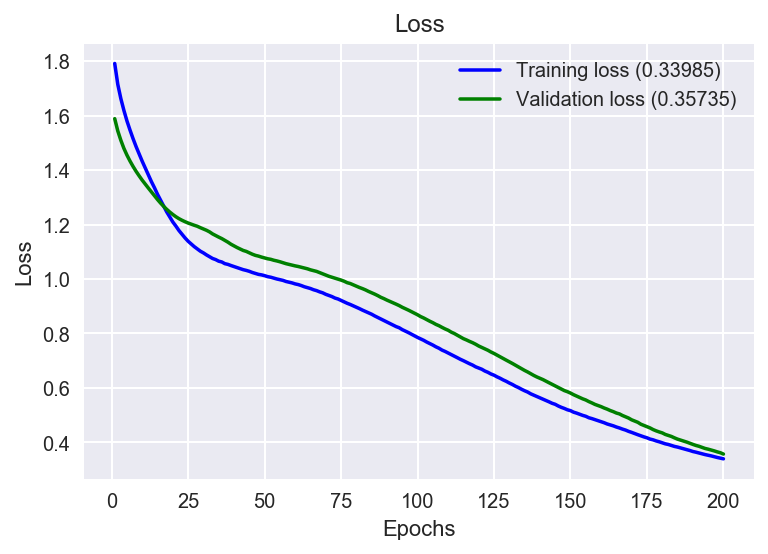

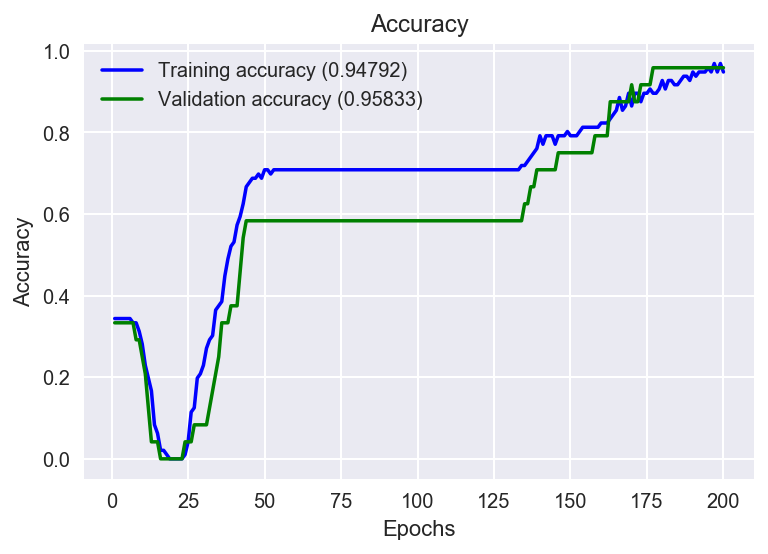

In [57]:
plot_history(history)


C:\Users\joaquin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.9583333333333334

Classification Report
             precision    recall  f1-score   support

          0    1.00000   1.00000   1.00000         8
          1    1.00000   0.90000   0.94737        10
          2    0.85714   1.00000   0.92308         6

avg / total    0.96429   0.95833   0.95884        24

[[8 0 0]
 [0 9 1]
 [0 0 6]]


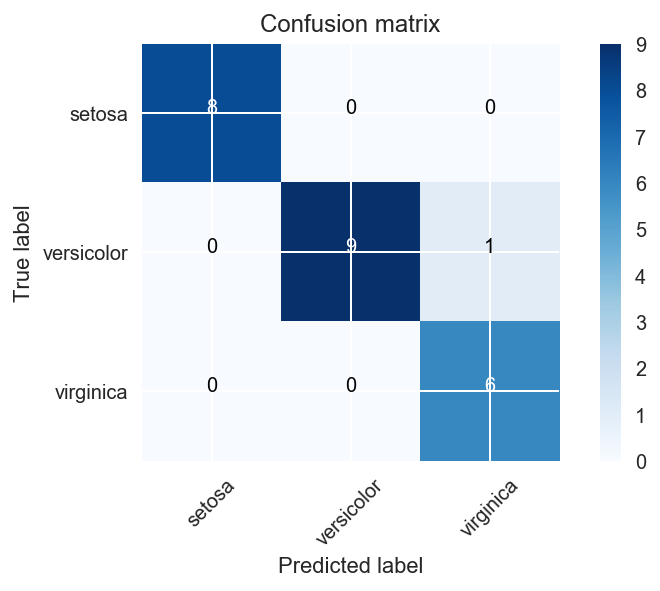

In [58]:
full_multiclass_report(model,
                       x_val,
                       y_val,
                       le.inverse_transform(np.arange(3)))

C:\Users\joaquin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.9333333333333333

Classification Report
             precision    recall  f1-score   support

          0    1.00000   1.00000   1.00000         9
          1    1.00000   0.83333   0.90909        12
          2    0.81818   1.00000   0.90000         9

avg / total    0.94545   0.93333   0.93364        30

[[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


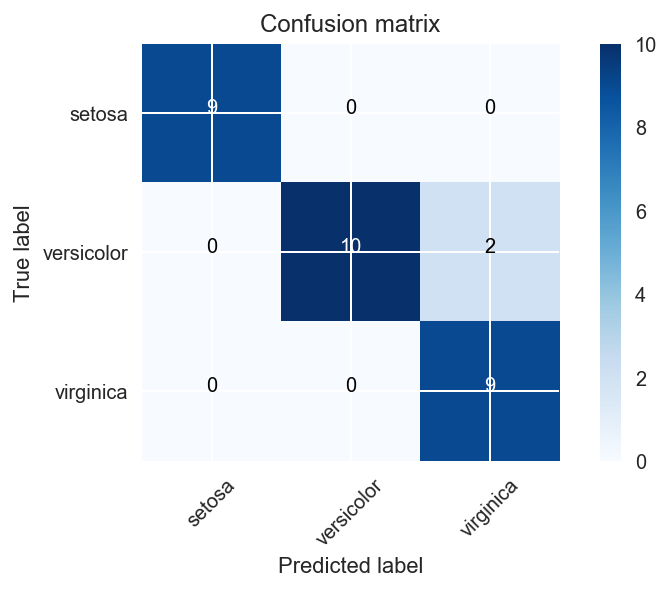

In [59]:
full_multiclass_report(model,
                       x_test,
                       y_test,
                       le.inverse_transform(np.arange(3)))

In [60]:
grid = GridSearchCV(model,
                    param_grid=param_grid,
                    return_train_score=True,
                   scoring=['precision_macro','recall_macro','f1_macro'],
                    refit='precision_macro')
grid_results = grid.fit(x_train,y_train)

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x0000025998E46E48>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [61]:
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed)

def create_model(dense_layers=[8],
                 activation='relu',
                 optimizer='rmsprop'):
    model = Sequential()

    for index, lsize in enumerate(dense_layers):
        # Input Layer - includes the input_shape
        if index == 0:
            model.add(Dense(lsize,
                            activation=activation,
                            input_shape=(4,)))
        else:
            model.add(Dense(lsize,
                            activation=activation))
            
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,
                        epochs=10, 
                        batch_size=5,
                        verbose=0)

param_grid = {'dense_layers': [[4],[8],[8,8]],
              'activation':['relu','tanh'],
              'optimizer':('rmsprop','adam'),
              'epochs':[10,50],
              'batch_size':[5,16]}

grid = GridSearchCV(model,
                    param_grid=param_grid,
                    return_train_score=True,
                    scoring=['precision_macro','recall_macro','f1_macro'],
                    refit='precision_macro')

grid_results = grid.fit(x_train,y_train)

print('Parameters of the best model: ')
print(grid_results.best_params_)

C:\Users\joaquin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\joaquin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\joaquin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Parameters of the best model: 
{'activation': 'tanh', 'batch_size': 5, 'dense_layers': [8, 8], 'epochs': 50, 'optimizer': 'rmsprop'}


C:\Users\joaquin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_380 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_381 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_382 (Dense)            (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


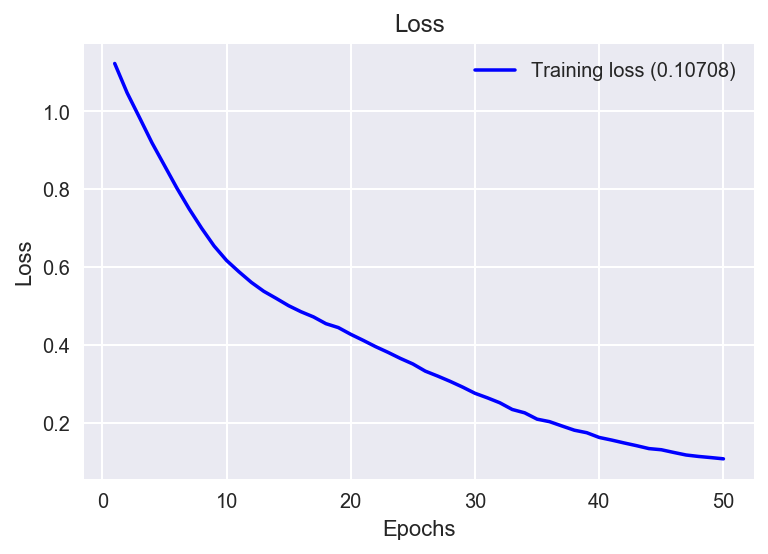

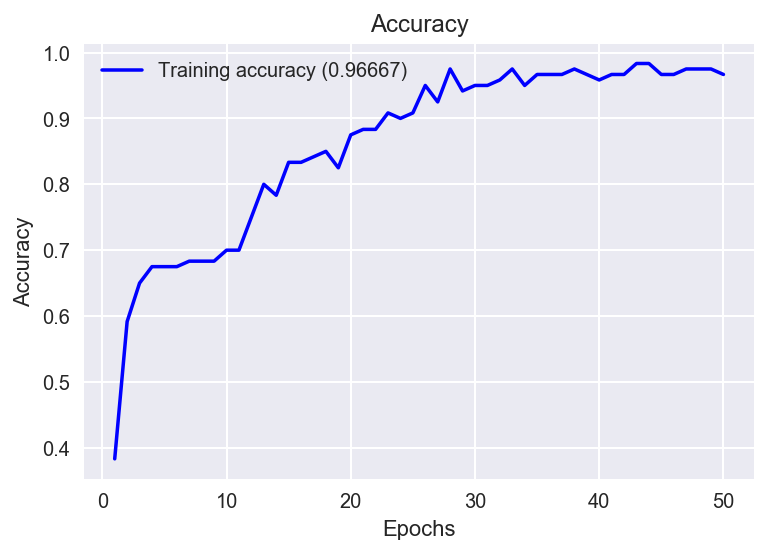

C:\Users\joaquin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.9333333333333333

Classification Report
             precision    recall  f1-score   support

          0    1.00000   1.00000   1.00000         9
          1    1.00000   0.83333   0.90909        12
          2    0.81818   1.00000   0.90000         9

avg / total    0.94545   0.93333   0.93364        30

[[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


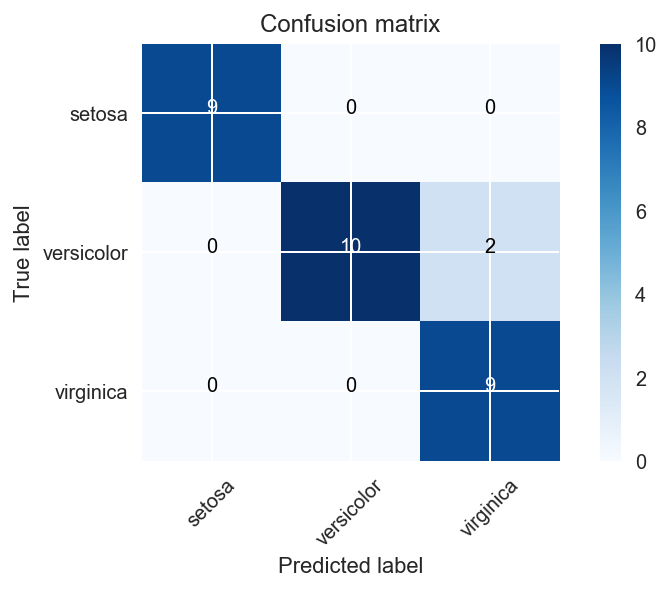

In [62]:
## First redefine y as categorical variable
y = to_categorical(iris.target,3)

## Rebuild the training and test set with the categorical y
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)

## Capture the best params
params = grid_results.best_params_

## create the model with the best params found
model = create_model(dense_layers=params['dense_layers'],
                     activation=params['activation'],
                     optimizer=params['optimizer'])

## Then train it and display the results
history = model.fit(x_train,
                    y_train,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose = 0)

model.summary()
plot_history(history)
full_multiclass_report(model,
                       x_test,
                       y_test,
                       classes=le.inverse_transform(np.arange(3)))